# Training and Evaluation of Regression Models

## Model Building and Prediction








### Processed Data from Exercise 6 for Further Analysis








In [6]:
dane <- read.csv2("weather.csv")
dane_nowe = dane[c( 'LAT', 'LON', 'ALTITUDE', 'RECORD.LENGTH','MEAN.ANNUAL.AIR.TEMP', 'MEAN.MONTHLY.MAX.TEMP', 'MEAN.MONTHLY.MIN.TEMP', 'MEAN.ANNUAL.WIND.SPEED', 'MEAN.CLOUD.COVER','MEAN.ANNUAL.SUNSHINE', 'MEAN.ANNUAL.RAINFALL', 'MAX.MONTHLY.WIND.SPEED', 'MAX.AIR.TEMP', 'MAX.WIND.SPEED', 'MAX.RAINFALL', 'MIN.AIR.TEMP', 'MEAN.RANGE.AIR.TEMP')]

sapply(dane_nowe, function(x) sum(x == ""))
dane_nowe[dane_nowe == ""] <- NA
liczba_wierszy_przed <- nrow(dane_nowe)
dane_czyste <- na.omit(dane_nowe)
liczba_wierszy_po <- nrow(dane_czyste)
liczba_usunietych_wierszy <- liczba_wierszy_przed - liczba_wierszy_po

split = sample.split(dane_czyste, SplitRatio = 0.3 , group = NULL)
dane_uczace = subset(dane_czyste, split == FALSE)
dane_testowe = subset(dane_czyste, split == TRUE)

vec_train = as.vector(dane_uczace['MEAN.ANNUAL.RAINFALL'])

vec_test = as.vector(dane_testowe['MEAN.ANNUAL.RAINFALL'])


matrix_test = data.matrix(dane_testowe[colnames(dane_testowe) != 'MEAN.ANNUAL.RAINFALL']) #bez zmiennej objaśnianej
matrix_train = data.matrix(dane_uczace[colnames(dane_uczace) != 'MEAN.ANNUAL.RAINFALL'])
korelacja <-  cor(dane_czyste)


LAT                    LON               ALTITUDE 
                     0                      0                      0 
         RECORD.LENGTH   MEAN.ANNUAL.AIR.TEMP  MEAN.MONTHLY.MAX.TEMP 
                     0                     NA                     NA 
 MEAN.MONTHLY.MIN.TEMP MEAN.ANNUAL.WIND.SPEED       MEAN.CLOUD.COVER 
                    NA                     NA                     NA 
  MEAN.ANNUAL.SUNSHINE   MEAN.ANNUAL.RAINFALL MAX.MONTHLY.WIND.SPEED 
                    NA                     NA                     NA 
          MAX.AIR.TEMP         MAX.WIND.SPEED           MAX.RAINFALL 
                    NA                     NA                     NA 
          MIN.AIR.TEMP    MEAN.RANGE.AIR.TEMP 
                    NA                      0

### Baseline Model for Annual Rainfall Prediction



This task involves creating the simplest baseline model for predicting mean annual rainfall, which does not include any explanatory variables. The baseline model predicts the same average value for all observations. The predicted value is compared to the mean annual rainfall at all stations. Additionally, the Root Mean Square Error (RMSE) is calculated to measure the error between observed and predicted rainfall values.

In [7]:
model1 = lm(MEAN.ANNUAL.RAINFALL ~ 1, data = dane_uczace)

srednia <- mean(dane_uczace$MEAN.ANNUAL.RAINFALL, rm.na=TRUE)

porownanie<-c(coef(model1),srednia)
porownanie


(Intercept)             
   749.2431    749.2431

In [8]:

rmse1_tr <-sqrt(mean((model1$residuals^2)))

print(rmse1_tr)

[1] 237.8738


### Baseline Model Prediction on Test Data



This task applies the baseline model to the test dataset using the predict() function. The predicted mean annual rainfall values are compared to the observed values in the test set. The Root Mean Square Error (RMSE) is calculated to evaluate the prediction accuracy of the baseline model on the test dataset.

In [9]:
predict1 <- predict(model1, newdata = dane_testowe)
rmse2_test <- sqrt(mean((predict1 - dane_testowe$MEAN.ANNUAL.RAINFALL)^2))

print(rmse2_test)


[1] 216.2409


### Linear Regression Model Based on Pearson Correlation

This task involves creating a linear regression model where the independent variable is the feature with a Pearson correlation coefficient of approximately 0.76 relative to mean annual rainfall. The model is trained on the training dataset, and the Root Mean Square Error (RMSE) is calculated to evaluate its performance on observed versus predicted values.

In [10]:
cor_0.76 <- names(which.min(abs(korelacja["MEAN.ANNUAL.RAINFALL",] - 0.76)))
model2 <- lm(MEAN.ANNUAL.RAINFALL ~ dane_uczace[[cor_0.76]], data = dane_uczace)

rmse3_tr <- sqrt(mean((model2$residuals^2)))
print(rmse3_tr)


[1] 154.7157


### Prediction and Evaluation on Test Data

The linear regression model is applied to the test dataset using the predict() function. Predicted rainfall values are compared to the actual observed values in the test set, and the RMSE is calculated to assess the accuracy of the model's predictions.

In [11]:
predict2 <- predict(model2, newdata = dane_testowe)
rmse4_test <- sqrt(mean((predict2 - dane_testowe$MEAN.ANNUAL.RAINFALL)^2))

print(rmse4_test)

Warning message:
"'newdata' miała 60 wierszy ale znalezione zmienne mają 144 wiersze"
Warning message in predict2 - dane_testowe$MEAN.ANNUAL.RAINFALL:
"długość dłuszego obiektu nie jest wielokrotnością długości krótszego obiektu"


[1] 289.4598


### Linear Regression Model Using Maximum Rainfall



This task involves creating a linear regression model where the independent variable is the maximum recorded rainfall (MAX.RAINFALL). The model is trained on the training dataset, and the Root Mean Square Error (RMSE) is calculated to evaluate its performance in predicting mean annual rainfall.

In [12]:
model3 <- lm(MEAN.ANNUAL.RAINFALL ~ MAX.RAINFALL, data = dane_uczace)

rmse_5_tr <- sqrt(mean((model3$residuals^2)))

print(rmse_5_tr)

[1] 112.2167


### Prediction and Evaluation on Test Data



The trained linear regression model is applied to the test dataset using the predict() function. The predicted mean annual rainfall values are compared to the observed values in the test dataset, and the RMSE is computed to assess the accuracy of the predictions.

In [13]:

predict3 <- predict(model3, newdata = dane_testowe)

rmse_6_test <- sqrt(mean((predict3 - dane_testowe$MEAN.ANNUAL.RAINFALL)^2))

print(rmse_6_test)

[1] 133.9033


### Multiple Linear Regression Model Using ALTITUDE, MAX.RAINFALL, and MEAN.ANNUAL.AIR.TEMP

This task creates a multiple linear regression model to predict mean annual rainfall (MEAN.ANNUAL.RAINFALL) based on three independent variables: ALTITUDE, MAX.RAINFALL, and MEAN.ANNUAL.AIR.TEMP. The R² coefficient is calculated to evaluate how well the model explains the variance in the dependent variable. An R² value of approximately 0.79 indicates that 79% of the variability in the mean annual rainfall is explained by the model, leaving 21% unexplained.

In [16]:
model4 <- lm(MEAN.ANNUAL.RAINFALL ~ ALTITUDE+MAX.RAINFALL + MEAN.ANNUAL.AIR.TEMP, data = dane_uczace)
r_squared <- summary(model4)$r.squared

print(paste("Współczynnik R^2 wynosi:", r_squared))

rmse7_tr <- sqrt(mean((model4$residuals^2)))

print(rmse7_tr)


[1] "Współczynnik R^2 wynosi: 0.795333447288117"
[1] 107.6143


### Prediction and Evaluation on Test Data

In [17]:

predict4 <- predict(model4, newdata = dane_testowe)
rmse_8_test <- sqrt(mean((predict4 - dane_testowe$MEAN.ANNUAL.RAINFALL)^2))

print( rmse_8_test)


[1] 130.7586


### Comparison of RMSE for Baseline, Correlation, Max Rainfall, and Multiple Regression Models

                                 Model     RMSE
1            Baseline Model (Training) 237.8738
2             Baseline Model (Testing) 216.2409
3  Correlation = 0.76 Model (Training) 154.7157
4   Correlation = 0.76 Model (Testing) 289.4598
5        Max Rainfall Model (Training) 112.2167
6         Max Rainfall Model (Testing) 133.9033
7 Multiple Regression Model (Training) 107.6143
8  Multiple Regression Model (Testing) 130.7586


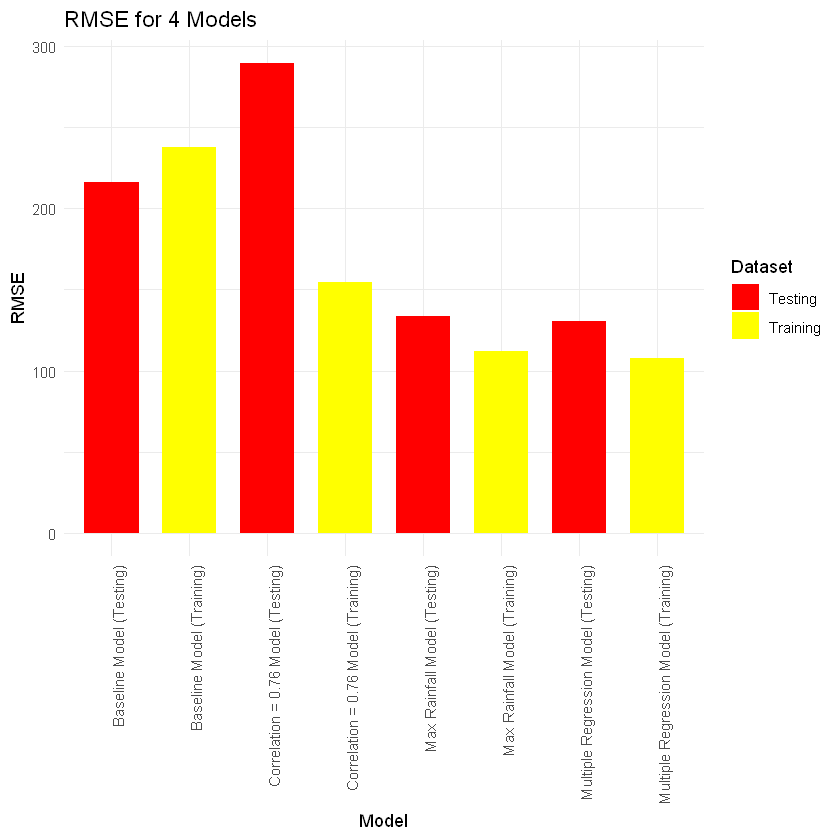

In [21]:
results <- data.frame(
  Model = c("Baseline Model (Training)", "Baseline Model (Testing)",  
            "Correlation = 0.76 Model (Training)", "Correlation = 0.76 Model (Testing)",
            "Max Rainfall Model (Training)", "Max Rainfall Model (Testing)", 
            "Multiple Regression Model (Training)", "Multiple Regression Model (Testing)"),
  RMSE = c(rmse1_tr, rmse2_test, rmse3_tr, rmse4_test, rmse_5_tr, rmse_6_test, rmse7_tr, rmse_8_test)
)

print(results)

library(ggplot2)
ggplot(results, aes(x = Model, y = RMSE, fill = factor(grepl("Training", Model)))) +
  geom_bar(stat = "identity", position = position_dodge(), width = 0.7) +
  scale_fill_manual(values = c("red", "yellow"), labels = c("Testing", "Training")) +
  labs(title = "RMSE for 4 Models",
       x = "Model",
       y = "RMSE",
       fill = "Dataset") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1))
